In [395]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [396]:
coin = itertools.product(np.arange(2) , repeat=3)
# 확률변수 x는 앞면(1)
b = []
for i in coin:
    a = sorted(collections.Counter(i).most_common() , reverse=True)

    if a[0][0] !=1:
        b.append(0)
    else:
        b.append(a[0][1])
d = collections.Counter(b)
d = dict(sorted(d.items()))
print(d)
ky , val = [] , []
ky = list(d.keys())
val = list(d.values())
for k,v in d.items():
    print(k)
    print(v)

A = pd.DataFrame([val] , columns = ky , index = ['P(X = x)'])
A.columns.names = ['X']
A = A.T
A['P(X = x)']  = A['P(X = x)'] / 8
A.loc['합계'] = A[:].sum(axis=0) #행 추가
A = A.T
A


{0: 1, 1: 3, 2: 3, 3: 1}
0
1
1
3
2
3
3
1


X,0,1,2,3,합계
P(X = x),0.125,0.375,0.375,0.125,1.0


In [397]:
a = np.arange(2)
b = itertools.product(a,  repeat= 3)
print(list(b))
e = list(filter(lambda x : collections.Counter(x).most_common()[0][0] ==1  and collections.Counter(x).most_common()[0][1] ==2 and x[1] == 1, b))

print(e)
print( len(e) * (1/5)*(4/5))

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[]
0.0


In [398]:
A = A.iloc[: , :-1]
A

X,0,1,2,3
P(X = x),0.125,0.375,0.375,0.125


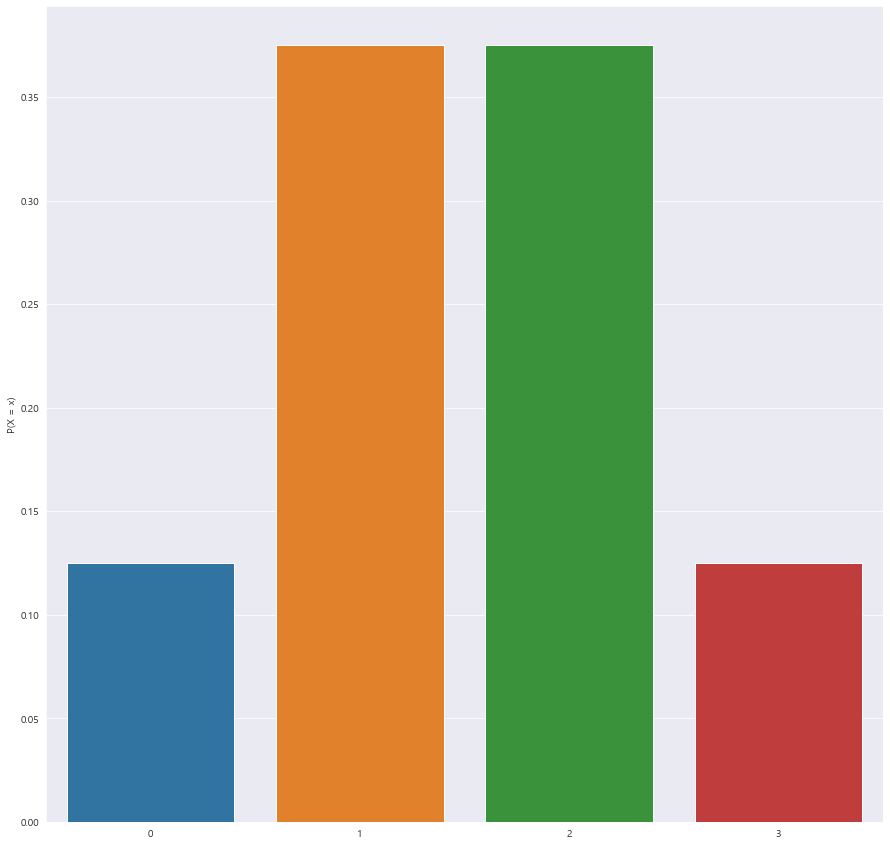

In [399]:
fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')

ax = sns.barplot(x= ky , y =A.loc['P(X = x)'])
plt.show()
#ax.bar.set_width([1])

In [400]:
#B= A.iloc[: , :-1]
# B = B.T
B = A.T
B = B.reset_index()

B

,X,P(X = x)
0,0,0.125
1,1,0.375
2,2,0.375
3,3,0.125


In [401]:
A = A.T
A

,P(X = x)
X,
0,0.125
1,0.375
2,0.375
3,0.125


In [402]:
ky

[0, 1, 2, 3]

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


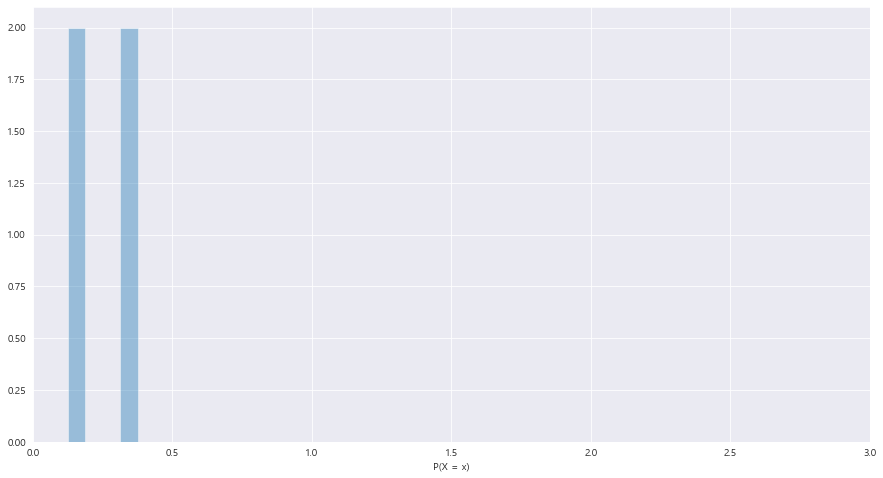

In [403]:
fig , ax1 = plt.subplots(figsize= (15,8))

ax1 = sns.distplot(A['P(X = x)'],bins = 4 , kde=False)
ax1.set_xlim([ky[0] , ky[-1]])
# ax1.xaxis.set_major_locator(ticker.MultipleLocator(1)) #x축 간격을 0.5로 설정
plt.show()

In [404]:
a = np.arange(1,7).tolist()
print(a)

ratio = list(itertools.product(a, repeat = 2))
ratio2 = list(map(lambda x : x[0]+x[1] , ratio)) # lambda 할 때 map, filter, reduce ,apply 생각!
ratio2 = collections.Counter(ratio2)
ratio2 = dict(sorted(ratio2.items()))
for k, v in ratio2.items():
    v = v/8
    ratio2[k] = v
ratio2



[1, 2, 3, 4, 5, 6]


{2: 0.125,
 3: 0.250,
 4: 0.375,
 5: 0.500,
 6: 0.625,
 7: 0.750,
 8: 0.625,
 9: 0.500,
 10: 0.375,
 11: 0.250,
 12: 0.125}

In [405]:
val = ratio2.values()
ky = ratio2.keys()

A = pd.DataFrame(val , index = ky )
A= A.T
A.index = ['P(X = x)']
A.columns.names = ['X']
A


X,2,3,4,5,6,7,8,9,10,11,12
P(X = x),0.125,0.25,0.375,0.5,0.625,0.75,0.625,0.5,0.375,0.25,0.125


In [406]:
B = A.T
B

,P(X = x)
X,
2,0.125
3,0.250
4,0.375
5,0.500
6,0.625
7,0.750
8,0.625
9,0.500
10,0.375


In [407]:
c  = B.groupby('P(X = x)')
c.size()

P(X = x)
0.125    2
0.250    2
0.375    2
0.500    2
0.625    2
0.750    1
dtype: int64

In [408]:
child = ['여자' ,'남자']
#0이 여자 1이 남자

S_x = list(itertools.product(child , repeat = 3))
S_x

[('여자', '여자', '여자'),
 ('여자', '여자', '남자'),
 ('여자', '남자', '여자'),
 ('여자', '남자', '남자'),
 ('남자', '여자', '여자'),
 ('남자', '여자', '남자'),
 ('남자', '남자', '여자'),
 ('남자', '남자', '남자')]

In [409]:
#확률 변수 X는 여자
res = []
for girls in S_x:

    girl = sorted(list(collections.Counter(girls).most_common()) , reverse=True)
    if girl[0][0] != '여자':
        res.append(0)
    else:
        res.append(girl[0][1])
    # girl =list(map(lambda x : x if sorted(collections.Counter(girls).most_common(), reverse=True)[0][0]=='여자' else 0 , girls))

print(res)

res2 = collections.Counter(res)

res2 = dict(sorted(res2.items()))

[3, 2, 2, 1, 2, 1, 1, 0]


In [410]:
res2

{0: 1, 1: 3, 2: 3, 3: 1}

In [411]:
ky = res2.keys()
val = res2.values()

A = pd.DataFrame([val] , columns = ky)
A.index = ['P(X = x)']
A.columns.names = ['X']
A

X,0,1,2,3
P(X = x),1,3,3,1


In [412]:
A.loc['P(X = x)'] = A.loc['P(X = x)'] /8
A

X,0,1,2,3
P(X = x),0.125,0.375,0.375,0.125


In [413]:
# A.iloc[0 ,:].mean()

In [414]:
print((0.375 + 0.375 * 2 + 0.125*3) / 8)

0.1875


In [415]:
print((0.375 + 0.375 * 2 + 0.125*3))

1.5


In [416]:
width = ['{} ~ {}'.format(i+0.5 , i+10.5) for i in range(9,68 , 10)]
x_i = [ round((i+0.5 - 5),1) for i in range(19, 70, 10)]
dosu = [9,9,9,10,2,1]
print(len(dosu))
print(len(x_i))

A = pd.DataFrame([dosu , x_i] , columns = width , index = ['도수(f_i)' , '계급값(x_i)']  )
A = A.T
A.index.names = ['계급 간격']
A['f_i_x_i'] = A['도수(f_i)'] * A['계급값(x_i)']
A.loc['합계'] = A[:].sum(axis=0)
A.iloc[-1,1] = '-'
A
# , columns=[['도수(f_i)' , '계급값(x_i)']], index = [width]

6
6


,도수(f_i),계급값(x_i),f_i_x_i
계급 간격,,,
9.5 ~ 19.5,9.0,14.5,130.5
19.5 ~ 29.5,9.0,24.5,220.5
29.5 ~ 39.5,9.0,34.5,310.5
39.5 ~ 49.5,10.0,44.5,445.0
49.5 ~ 59.5,2.0,54.5,109.0
59.5 ~ 69.5,1.0,64.5,64.5
합계,40.0,-,1280.0


In [417]:
B = pd.DataFrame([dosu] , columns = x_i)
B.index = ['P(X = x)']
B.loc['P(X = x)'] = B.loc['P(X = x)'] / 40
B

,14.5,24.5,34.5,44.5,54.5,64.5
P(X = x),0.225,0.225,0.225,0.25,0.05,0.025


In [418]:
B = B.T
B = B.reset_index()
B

,index,P(X = x)
0,14.5,0.225
1,24.5,0.225
2,34.5,0.225
3,44.5,0.250
4,54.5,0.050
5,64.5,0.025


In [419]:
B['x * p(x)'] = (B.loc[: , 'P(X = x)']) * B.loc[:, 'index']
B['x**2 * p(x)'] = (B.loc[: , 'P(X = x)']) * (B.loc[:, 'index']**2)
B.loc['합계']= B[:].sum(axis=0)
# B.iloc[-1,1] = '-'
avg = B.iloc[-1, -2]
B

,index,P(X = x),x * p(x),x**2 * p(x)
0,14.5,0.225,3.2625,47.30625
1,24.5,0.225,5.5125,135.05625
2,34.5,0.225,7.7625,267.80625
3,44.5,0.250,11.1250,495.06250
4,54.5,0.050,2.7250,148.51250
5,64.5,0.025,1.6125,104.00625
합계,237.0,1.000,32.0000,1197.75000


In [420]:
var = B.iloc[-1,-1] - avg**2
var

173.75

In [421]:
a = np.arange(1,7)

b = list(itertools.product(a, repeat= 3))
c = list(filter(lambda x : sorted(collections.Counter(x).most_common())[0][0]== 1 or (len(collections.Counter(x).most_common()) >1 and sorted(collections.Counter(x).most_common() , reverse=True)[1][0] == 1) , b))

c

[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 3, 6),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 4, 6),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (1, 5, 6),
 (1, 6, 1),
 (1, 6, 2),
 (1, 6, 3),
 (1, 6, 4),
 (1, 6, 5),
 (1, 6, 6),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 2, 1),
 (2, 3, 1),
 (2, 4, 1),
 (2, 5, 1),
 (2, 6, 1),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 2, 1),
 (3, 3, 1),
 (3, 4, 1),
 (3, 5, 1),
 (3, 6, 1),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 2, 1),
 (4, 3, 1),
 (4, 4, 1),
 (4, 5, 1),
 (4, 6, 1),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 2, 1),
 (5, 3, 1),
 (5, 4, 1),
 (5, 5, 1),
 (5, 6, 1),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6,

In [422]:
res = []
for i in c:
    a = collections.Counter(i)
    # print(a)
    # print(a[1])
    res.append(a[1])
res = collections.Counter(res)
res

Counter({3: 1, 2: 15, 1: 75})

In [423]:
a = collections.Counter(c[3])
print(a)
print(a[1])

Counter({1: 2, 4: 1})
2


In [424]:
b = len(list(itertools.combinations(np.arange(10) , 2)))*(math.pow(0.2 , 2)) *(math.pow(0.8 , 8))
print(b)

0.3019898880000002


In [425]:
b = 1- len(list(itertools.combinations(np.arange(10) , 0)))*(math.pow(0.2 , 0)) *(math.pow(0.8 , 10)) #n은 전체 갯수 , x는 맞춘 갯수
print(b)

0.8926258175999999


In [426]:
b = len(list(itertools.combinations(np.arange(4) , 2)))*(math.pow(0.3 , 2)) *(math.pow(0.7 , 2))
print(b)

0.2646


In [427]:
print(1 - 0.8497)

0.1503


In [428]:
b = len(list(itertools.combinations(np.arange(6) , 0)))*(math.pow(0.3 , 0)) *(math.pow(0.7 , 6))
print(b)

0.11764899999999996


In [429]:
b = len(list(itertools.combinations(np.arange(9) , 5)))*(math.pow(0.3 , 5)) *(math.pow(0.7 , 4))
print(b)

0.07351381799999998


In [430]:
sume = 0
for x in range(6):
    a = len(list(itertools.combinations(np.arange(6) , x)))*(math.pow(0.3 , x)) *(math.pow(0.7 , 6-x))
    b = len(list(itertools.combinations(np.arange(9) , 5-x)))*(math.pow(0.3 , 5-x)) *(math.pow(0.7 , 9-(5-x)))
    # print('a : {}'.format(a))
    # print('b : {}'.format(b))
    s = a*b
    sume += s
    print('P(x = {} , y = {}) , s : {}'.format(x , 5-x , s))
print(sume)

P(x = 0 , y = 5) , s : 0.008648827173881995
P(x = 1 , y = 4) , s : 0.05189296304329196
P(x = 2 , y = 3) , s : 0.08648827173881993
P(x = 3 , y = 2) , s : 0.04942186956503996
P(x = 4 , y = 1) , s : 0.009266600543444992
P(x = 5 , y = 0) , s : 0.0004118489130419996
0.20613038097752084


In [446]:
sume = 0
for x in range(2):
    a = len(list(itertools.combinations(np.arange(5) , x)))*(math.pow(0.3 , x)) *(math.pow(0.7 , 5-x))
    b = len(list(itertools.combinations(np.arange(5) , 1-x)))*(math.pow(0.3 , 1-x)) *(math.pow(0.7 , 5-(1-x)))

    s = a*b
    sume += s
    print('P(x = {} , y = {}) , s : {}'.format(x , 1-x , s))
print(sume)


print(1- len(list(itertools.combinations(np.arange(5) , 0)))*(math.pow(0.3 , 0)) *(math.pow(0.7 , 5))**2)

P(x = 0 , y = 1) , s : 0.060530410499999965
P(x = 1 , y = 0) , s : 0.060530410499999965
0.12106082099999993
0.9717524751000001


In [451]:
print(10 * 0.05)
print(math.sqrt(0.5 * 0.95))

0.5
0.689202437604511


In [453]:
print(0.406 - 0.135)

0.271
